In [8]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_US['job_skills'] = df_US['job_skills'].apply(lambda x: x if isinstance(x, list) else [])

In [9]:
df_US = df[df['job_country'] == 'United States']

In [17]:
df_skills = df_US.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False,)

In [18]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

In [29]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = "jobs_total")

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on = "job_title_short", how = "left")

df_skills_perc['skill_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100

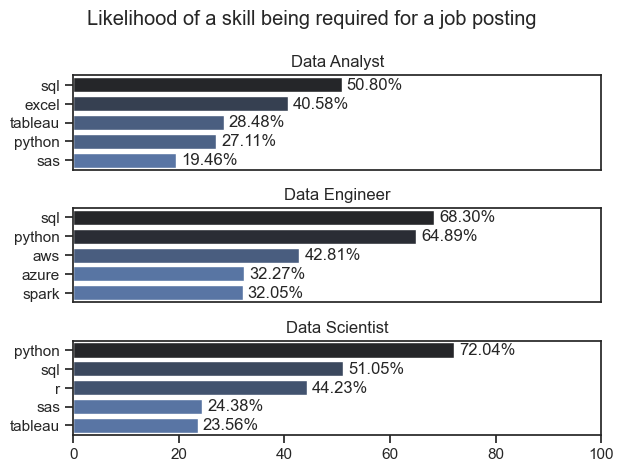

In [41]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style = 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue = 'skill_count', palette = 'dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].legend().remove()
    ax[i].set_xlim(0, 100)

    for n, value in enumerate(df_plot['skill_percent']):
        ax[i].text(value+1, n, f'{value:.2f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
        
fig.suptitle('Likelihood of a skill being required for a job posting')
plt.tight_layout()
plt.show()